In [2]:
# starter imports + mount to drive
import math
import sys
import numpy as np
import re
import random
import os
# import cv2

import ipywidgets
from ipywidgets import interact

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend

# from collections import Counter
from matplotlib import pyplot as plt
from PIL import Image

# For confusion matrix
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

# Google drive access
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
def files_in_folder(folder_path):
    
    return os.listdir(folder_path)
    # '''
    # Returns a list of strings where each entry is a file in the folder_path, but Jamen fixed it??

    # folder_path : str
    #     A string to folder for which the file listing is returned.
    # '''
    
    # files_A = !ls "{folder_path}"

    # files_list = []
    # for twoFileStr in files_A:
    #     for fileName in twoFileStr.split("\t"):
    #         if len(fileName) > 0: files_list.append(fileName)

    # return files_list


In [4]:
# Load images
dataPath = "data"

galaxyPath = dataPath + "/galaxy"
starPath = dataPath + "/star"

# def files_in_folder(folder_path):
#   '''
#   Returns a list of strings where each entry is a file in the folder_path.

#   folder_path : str
#      A string to folder for which the file listing is returned.
#   '''
#   files_A = !ls "{folder_path}"
#   print(files_A)
#   # The files when listed from Google Drive have a particular format. They are
#   # grouped in sets of 4 and have spaces and tabs as delimiters.

#   # Split the string listing sets of 4 files by tab and space and remove any
#   # empty splits.
#   files_B = [list(filter(None, re.split('\t|\s', files))) for files in files_A]

#   # Concatenate all splits into a single sorted list
#   files_C = []
#   for element in files_B:
#     files_C = files_C + element
#   files_C.sort()

#   return files_C

galaxyImageFileNames = files_in_folder(galaxyPath)
starImageFileNames = files_in_folder(starPath)

## Set Aside Test Data
Pick what images are set aside for testing at the end. I feel like 50 galaxy images and 200 Star images is good. This should be enough for a good sample, but we're limited in the number of galaxy images available

If this section is commented out, it means its already done.

In [5]:
# Make the folders if needed
if not os.path.exists("data/test_star"):
    os.mkdir("data/test_star")

if not os.path.exists("data/test_galaxy"):
    os.mkdir("data/test_galaxy")

test_galaxy_filenames = random.sample(galaxyImageFileNames, 50)
test_star_filenames = random.sample(starImageFileNames, 200)

for fileName in test_galaxy_filenames:
    os.rename("{}/galaxy/{}".format(dataPath, fileName), "{}/test_galaxy/{}".format(dataPath, fileName))
    # test_galaxy_filenames.remove(fileName)

for fileName in test_star_filenames:
    os.rename("{}/star/{}".format(dataPath, fileName), "{}/test_star/{}".format(dataPath, fileName))
    # test_star_filenames.remove(fileName)

Seems to be some issue with appending arrays of arrays where the elements have different shapes. Testing...

In [6]:
# Test np.array having different dimenstion arrays at each index:
# testArr = np.array([[0, 1, 1], 1], dtype=object)
# testArr = np.append(testArr, [[1, 2, 3], 2])
# print(testArr[2])

The arrays didn't seem to work well. I'll use lists, and then I can also just randomize the order with random.shuffle(list)
https://www.w3schools.com/python/ref_random_shuffle.asp

In [7]:
# trainImages = []
# trainImages.append([[1, 2, 3], 4])
# trainImages.append([[4, 2, 3], 5])
# print(trainImages[1][0])

In [8]:
# Now want all the images shuffled together, with all the correct answers in the same order.

# allImages = np.array([[np.array(Image.open(f'{galaxyPath}/{file}')), 0] for file in galaxyImageFileNames[:]])
# print("Done Galaxies")
# allImages = np.append(allImages, np.array([[np.array(Image.open(f'{starPath}/{file}')), 1] for file in starImageFileNames[:]]))

# numImages = allImages.shape[0]
# print("Loaded {:} images from data folders.".format(allImages.shape[0]))


# The individual images are on the level of array[][]

# Display the images in their original state so we can see them
# Figure size in "inches", i guess it determines how it displays on my screen

# fig = plt.figure(figsize=(7, 1.4*numImages))
# for i in range(numImages):
#     fig.add_subplot(numImages/2 + 1, 2, i + 1)
#     plt.imshow(imgset0[i][0])
#     plt.axis('off')
#     plt.title("Figure " + str(i + 1))
# plt.show()

Note: code block below works, but takes ~20 mins on first run. Especially the stars for

*   List item
*   List item

some reason.

In [9]:
# Get the new lists of filenames, excluding ones removed for testing
galaxyImageFileNames = files_in_folder(galaxyPath)
starImageFileNames = files_in_folder(starPath)

trainImages = []
numTotalImages = len(galaxyImageFileNames) + len(starImageFileNames)
imagesLoaded = 0

for file in galaxyImageFileNames:
    trainImages.append([np.array(Image.open(f'{galaxyPath}/{file}'))[:, :, 0], np.array([0, 1])])
    # Note ^ only need 0'th color channel since all channels are the same
    imagesLoaded += 1
    if imagesLoaded % 200 == 0:
        print("Loaded {} of {} images; {}% complete.".format(imagesLoaded,
                                                             numTotalImages, round(100*imagesLoaded/numTotalImages, 1)))

print("Done loading galaxies.")
for file in starImageFileNames:
    trainImages.append([np.array(Image.open(f'{starPath}/{file}'))[:, :, 0], np.array([1, 0])])
    imagesLoaded += 1
    if (imagesLoaded % 200 == 0):
        print("Loaded {} of {} images; {}% complete.".format(imagesLoaded,
                                                             numTotalImages, round(100*imagesLoaded/numTotalImages, 1)))
print("Done loading stars.")

Loaded 200 of 3736 images; 5.4% complete.
Loaded 400 of 3736 images; 10.7% complete.
Loaded 600 of 3736 images; 16.1% complete.
Loaded 800 of 3736 images; 21.4% complete.
Done loading galaxies.
Loaded 1000 of 3736 images; 26.8% complete.
Loaded 1200 of 3736 images; 32.1% complete.
Loaded 1400 of 3736 images; 37.5% complete.
Loaded 1600 of 3736 images; 42.8% complete.
Loaded 1800 of 3736 images; 48.2% complete.
Loaded 2000 of 3736 images; 53.5% complete.
Loaded 2200 of 3736 images; 58.9% complete.
Loaded 2400 of 3736 images; 64.2% complete.
Loaded 2600 of 3736 images; 69.6% complete.
Loaded 2800 of 3736 images; 74.9% complete.
Loaded 3000 of 3736 images; 80.3% complete.
Loaded 3200 of 3736 images; 85.7% complete.
Loaded 3400 of 3736 images; 91.0% complete.
Loaded 3600 of 3736 images; 96.4% complete.
Done loading stars.


Check shape of data and stuff

* Image types are numpy ndarray
* Image sizes are 12288 (changed)
* Image dimensions are (64, 64, 3) (but now changed to (64, 64, 1)
* even though 3 color channels, they all have the same value. Only need one layer.

Shuffle the list, and separate into X and Y datasets (training data and answers)

Stacking arrays: https://stackoverflow.com/questions/56486275/combining-list-of-2d-numpy-arrays


In [11]:
random.shuffle(trainImages)

onlyImages = np.stack([entry[0] for entry in trainImages])
answers = np.stack([entry[1] for entry in trainImages])

In [12]:
conv_model = models.Sequential()
# 32, 3, 3 makes a 3 by 3 filter thing for 32 things
# input shape is the dimensions of the images. (Change RGB -> Greyscale to speed up?)
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dropout(0.5))
conv_model.add(layers.Dense(256, activation='relu'))
# 2 is because there are 2 outputs (galaxy or star)
conv_model.add(layers.Dense(2, activation='softmax'))

LEARNING_RATE = 1e-4
conv_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE), metrics=['acc'])

In [13]:
VALIDATION_SPLIT = 0.1 #how much of the data to use for training vs testing

# optional to reset the thingies
# X_dataset is inputs, Y_dataset is desired outputs
history_conv = conv_model.fit(onlyImages, answers, validation_split=VALIDATION_SPLIT, epochs=20, batch_size=32)
# ^ originally was 20 epochs, batch size 16
# ^ batch size was originally 16; changed to 8

Epoch 1/20
106/106 [==============================] - 14s 123ms/step - loss: 3.6713 - acc: 0.6621 - val_loss: 0.6327 - val_acc: 0.7299
Epoch 2/20
106/106 [==============================] - 12s 116ms/step - loss: 0.6170 - acc: 0.7278 - val_loss: 0.5708 - val_acc: 0.7112
Epoch 3/20
106/106 [==============================] - 16s 149ms/step - loss: 0.5174 - acc: 0.7588 - val_loss: 0.6344 - val_acc: 0.6444
Epoch 4/20
106/106 [==============================] - 14s 133ms/step - loss: 0.4514 - acc: 0.7885 - val_loss: 0.4482 - val_acc: 0.7968
Epoch 5/20
106/106 [==============================] - 13s 126ms/step - loss: 0.3896 - acc: 0.8227 - val_loss: 0.4798 - val_acc: 0.7807
Epoch 6/20
106/106 [==============================] - 13s 124ms/step - loss: 0.3550 - acc: 0.8406 - val_loss: 0.3956 - val_acc: 0.8235
Epoch 7/20
106/106 [==============================] - 14s 135ms/step - loss: 0.2854 - acc: 0.8816 - val_loss: 0.8601 - val_acc: 0.5508
Epoch 8/20
106/106 [==============================] - 1

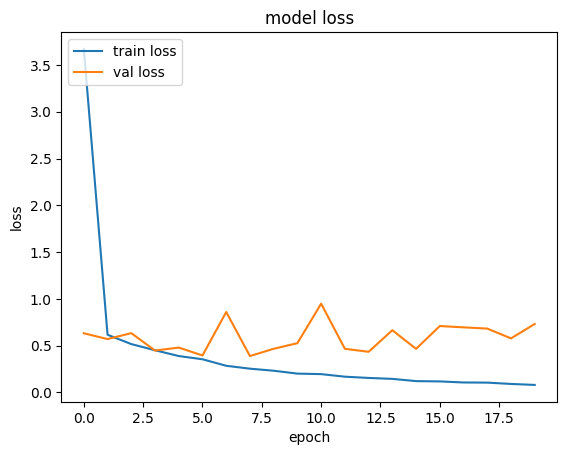

In [14]:
# Plot top losses
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')

# interesting to see on a log plot too
#ax = plt.gca()
#ax.set_yscale('log')
plt.show()

Use the model to predict the test images. Start by loading the test images.

predictionsIndexes is a 1d array containing index of max entry on that row.

In [15]:
#load the test images
galaxyPath = dataPath + "/test_galaxy"
starPath = dataPath + "/test_star"

galaxyImageFileNames = files_in_folder(galaxyPath)
starImageFileNames = files_in_folder(starPath)

testImages = []
numTotalImages = len(galaxyImageFileNames) + len(starImageFileNames)
imagesLoaded = 0

for file in galaxyImageFileNames:
    testImages.append([np.array(Image.open(f'{galaxyPath}/{file}'))[:, :, 0], np.array([0, 1])])
    # Note ^ only need 0'th color channel since all channels are the same
    imagesLoaded += 1
    if imagesLoaded % 50 == 0:
        print("Loaded {} of {} images; {}% complete.".format(imagesLoaded,
                                                             numTotalImages, round(100*imagesLoaded/numTotalImages, 1)))

print("Done loading test galaxies.")
for file in starImageFileNames:
    testImages.append([np.array(Image.open(f'{starPath}/{file}'))[:, :, 0], np.array([1, 0])])
    imagesLoaded += 1
    if (imagesLoaded % 50 == 0):
        print("Loaded {} of {} images; {}% complete.".format(imagesLoaded,
                                                             numTotalImages, round(100*imagesLoaded/numTotalImages, 1)))
print("Done loading test stars.")

# Shuffle and separate into data and answers
random.shuffle(testImages)
onlyTestImages = np.stack([entry[0] for entry in testImages])
testAnswers = np.stack([entry[1] for entry in testImages])

print(testAnswers.shape)
print(onlyTestImages.shape)

Loaded 50 of 250 images; 20.0% complete.
Done loading test galaxies.
Loaded 100 of 250 images; 40.0% complete.
Loaded 150 of 250 images; 60.0% complete.
Loaded 200 of 250 images; 80.0% complete.
Loaded 250 of 250 images; 100.0% complete.
Done loading test stars.
(250, 2)
(250, 64, 64)


8/8 [==============================] - 0s 30ms/step
What is the average confidence in the correct answer, based on the ground truth of the image?
Star:   93.4
Galaxy: 52.4


<Axes: title={'center': 'actual on y axis\n predicted on x-axis'}>

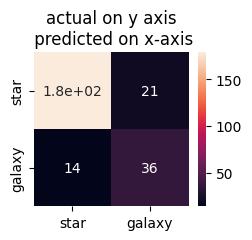

In [20]:
predictions_raw = conv_model.predict(onlyTestImages, use_multiprocessing=True)
predictions_old = np.argmax(predictions_raw, axis=1)
Y_dataset_1D = np.argmax(testAnswers, axis=1)

# Make predictions; if high confidence of star, pick star, otherwise pick galaxy
predictions = []
THRESH = 0.8

for index in range(len(predictions_old)):
    if predictions_raw[index][0] > THRESH:
        predictions.append(0)
    else:
        predictions.append(1)

predictions = np.array(predictions)

galaxyNumber = 0
starNumber = 0
totalGalaxyConfidence = 0
totalStarConfidence = 0

for index in range(len(predictions_old)):
    if Y_dataset_1D[index] == 1: # Since index 1 is where you find the value of 1 in the answer vector representing galaxy
        star_or_galaxy = "galaxy."
        galaxyNumber += 1
        totalGalaxyConfidence += predictions_raw[index][1]
    else:
        star_or_galaxy = "star.  "
        starNumber += 1
        totalStarConfidence += predictions_raw[index][0]

    # print("Object: {} confidence: {}".format(star_or_galaxy, max(predictions_raw[index])))


print("What is the average confidence in the correct answer, based on the ground truth of the image?")
print("Star:   {}".format(round(100*totalStarConfidence/starNumber, 1)))
print("Galaxy: {}".format(round(100*totalGalaxyConfidence/galaxyNumber, 1)))

# print(predictions_raw)
# print(predictions.shape)
# print(Y_dataset_1D.shape)

# Plot Confusion matrix
conf_mat = confusion_matrix(Y_dataset_1D, predictions)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ["star", "galaxy"]],
                  columns = [i for i in ["star", "galaxy"]])
plt.figure(figsize = (2.5, 2))
plt.title("actual on y axis\n predicted on x-axis")
plt.xlabel("predicted")
plt.ylabel("actual")
sn.heatmap(df_cm, annot=True)